In [1]:
import os
import platform
import subprocess
import pandas as pd
import numpy
from IPython.display import Image

RUNS = 10

FILENAME = 'CMP.csv'

def system_info():
    print(os.name, platform.system(), platform.release())
    print(os.popen("clinfo | grep -B 2 -A 4 'Device Vendor ID'").read())
    print(os.popen("clinfo | grep NOTE -A 3").read())
    
# Creating Pandas DataFrame 
if os.path.isfile(FILENAME):
    df = pd.read_csv(FILENAME)
else:
    df = pd.DataFrame({"version": [], "platform": [], "execution_time_ms": []})
    
# List previous data
# List previous data (average)
df.groupby(['platform', 'version']) \
  .agg({'version':'count', 'execution_time_ms':'mean'}) \
  .rename(columns={'version':'count','version':'executions'})

executions  \
platform                                   version                 
Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz   OpenMP             10   
                                           SYCL               10   
Intel(R) Core(TM) i5-7400 CPU @ 3.00GHz    OpenCL             10   
                                           OpenMP             10   
                                           SYCL               10   
Intel(R) Core(TM) i7-5500U CPU @ 2.40GHz   OpenCL             10   
                                           OpenMP              9   
                                           SYCL               10   
Intel(R) FPGA Emulation Device             FPGA_SYCL          20   
Intel(R) Gen9 HD Graphics NEO              OpenCL             10   
                                           SYCL               10   
Intel(R) Graphics Gen8 [0x1616]            OpenCL             10   
                                           SYCL               10   
Intel(R) Iris(TM) Plus Graphics 640        OpenCL             10   
Intel(R) Xeon(R) Gold 6128 CPU @ 3.40GHz   SYCL               10   
Intel(R) Xeon(R) Silver 4208 CPU @ 2.10GHz OpenCL             10   
                                           OpenMP             10   
                                           SYCL               10   

                                                      execution_time_ms  
platform                                   version                       
Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz   OpenMP           2372.600000  
                                           SYCL              902.300000  
Intel(R) Core(TM) i5-7400 CPU @ 3.00GHz    OpenCL            201.100000  
                                           OpenMP            656.400000  
                                           SYCL              459.800000  
Intel(R) Core(TM) i7-5500U CPU @ 2.40GHz   OpenCL            425.200000  
                                           OpenMP           1520.444444  
                                           SYCL              617.800000  
Intel(R) FPGA Emulation Device             FPGA_SYCL        2072.600000  
Intel(R) Gen9 HD Graphics NEO              OpenCL            160.500000  
                                           SYCL              640.600000  
Intel(R) Graphics Gen8 [0x1616]            OpenCL            179.200000  
                                           SYCL              508.900000  
Intel(R) Iris(TM) Plus Graphics 640        OpenCL            315.500000  
Intel(R) Xeon(R) Gold 6128 CPU @ 3.40GHz   SYCL              272.400000  
Intel(R) Xeon(R) Silver 4208 CPU @ 2.10GHz OpenCL            164.500000  
                                           OpenMP            220.500000  
                                           SYCL              456.300000

# MacBook Pro (13-inch, 2017)

In [2]:
system_info()

('posix', 'Darwin', '19.4.0')
  Device Name                                     Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz
  Device Vendor                                   Intel
  Device Vendor ID                                0xffffffff
  Device Version                                  OpenCL 1.2 
  Driver Version                                  1.1
  Device OpenCL C Version                         OpenCL C 1.2 
  Device Type                                     CPU
--
--
  Device Name                                     Intel(R) Iris(TM) Plus Graphics 640
  Device Vendor                                   Intel Inc.
  Device Vendor ID                                0x1024500
  Device Version                                  OpenCL 1.2 
  Driver Version                                  1.2(Mar 15 2020 21:29:48)
  Device OpenCL C Version                         OpenCL C 1.2 
  Device Type                                     GPU



# MacBook Pro (13-inch, 2017) + Docker

In [11]:
system_info()

posix Linux 4.19.76-linuxkit
  Device Name                                     Intel(R) FPGA Emulation Device
  Device Vendor                                   Intel(R) Corporation
  Device Vendor ID                                0x1172
  Device Version                                  OpenCL 1.2 
  Driver Version                                  2020.9.3.0.08_110447.xmain
  Device OpenCL C Version                         OpenCL C 1.2 
  Device Type                                     Accelerator
--
  Device Name                                     Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz
  Device Vendor                                   Intel(R) Corporation
  Device Vendor ID                                0x8086
  Device Version                                  OpenCL 2.1 (Build 0)
  Driver Version                                  2020.10.4.0.15
  Device OpenCL C Version                         OpenCL C 2.0 
  Device Type                                     CPU



# GPU-server (Hermes) + Docker (oneAPI)

In [13]:
system_info()

posix Linux 4.15.0-65-generic
  Device Name                                     Intel(R) FPGA Emulation Device
  Device Vendor                                   Intel(R) Corporation
  Device Vendor ID                                0x1172
  Device Version                                  OpenCL 1.2 
  Driver Version                                  2020.9.3.0.08_110447.xmain
  Device OpenCL C Version                         OpenCL C 1.2 
  Device Type                                     Accelerator
--
  Device Name                                     Intel(R) Xeon(R) Silver 4208 CPU @ 2.10GHz
  Device Vendor                                   Intel(R) Corporation
  Device Vendor ID                                0x8086
  Device Version                                  OpenCL 2.1 (Build 0)
  Driver Version                                  2020.10.4.0.15
  Device OpenCL C Version                         OpenCL C 2.0 
  Device Type                                     CPU



## PC João ACER Aspire E 15

In [6]:
system_info()

posix Linux 5.4.0-52-generic
  Device Name                                     Intel(R) FPGA Emulation Device
  Device Vendor                                   Intel(R) Corporation
  Device Vendor ID                                0x1172
  Device Version                                  OpenCL 1.2 
  Driver Version                                  2020.11.8.0.27
  Device OpenCL C Version                         OpenCL C 1.2 
  Device Type                                     Accelerator
--
  Device Name                                     Intel(R) Core(TM) i7-5500U CPU @ 2.40GHz
  Device Vendor                                   Intel(R) Corporation
  Device Vendor ID                                0x8086
  Device Version                                  OpenCL 2.1 (Build 0)
  Driver Version                                  2020.11.8.0.27
  Device OpenCL C Version                         OpenCL C 2.0 
  Device Type                                     CPU
--
  Device Name                 

# Intel DevCloud

In [2]:
system_info()

posix Linux 4.15.18
  Device Name                                     Intel(R) FPGA Emulation Device
  Device Vendor                                   Intel(R) Corporation
  Device Vendor ID                                0x1172
  Device Version                                  OpenCL 1.2 
  Driver Version                                  2020.11.11.0.13_160000
  Device OpenCL C Version                         OpenCL C 1.2 
  Device Type                                     Accelerator
--
  Device Name                                     Intel(R) Xeon(R) Gold 6128 CPU @ 3.40GHz
  Device Vendor                                   Intel(R) Corporation
  Device Vendor ID                                0x8086
  Device Version                                  OpenCL 2.1 (Build 0)
  Driver Version                                  2020.11.11.0.13_160000
  Device OpenCL C Version                         OpenCL C 2.0 
  Device Type                                     CPU




## OpenCL version

In [17]:
for i in range(RUNS): 
    run = subprocess.Popen("./cmp-ocl2 -d 2 -aph 600 -c0 1.98e-7 -c1 1.77e-6 -i ../../../../datasets/simple-synthetic.su -nc 5 -tau 0.002 -v 0",
                           cwd = "OpenCL/build/",
                           shell = True,
                           stdout = subprocess.PIPE,
                           stderr = subprocess.PIPE,
                           universal_newlines = True)
    result = run.communicate()[0].split(",")
    df = df.append(pd.DataFrame({"version"          : ["OpenCL"], 
                                 "platform"         : [result[0]], 
                                 "execution_time_ms": [int(result[1])]}), sort=False)
          
df.to_csv(FILENAME, index = False, header = True)

## OpenMP version

In [9]:
for i in range(RUNS): 
    run = subprocess.Popen("./cmp-omp2  -aph 600 -c0 1.98e-7 -c1 1.77e-6 -i ../../../../datasets/simple-synthetic.su -nc 5 -tau 0.002 -v 0",
                           cwd = "OpenMP/build/",
                           shell = True,
                           stdout = subprocess.PIPE,
                           stderr = subprocess.PIPE,
                           universal_newlines = True)
    result = run.communicate()[0].split(",")
    df = df.append(pd.DataFrame({"version"          : ["OpenMP"], 
                                 "platform"         : ["Intel(R) Xeon(R) Silver 4208 CPU @ 2.10GHz"], 
                                 "execution_time_ms": [int(result[0])]}), sort=False)
          
df.to_csv(FILENAME, index = False, header = True)

## SYCL version (using Docker)

In [3]:
for i in range(RUNS): 
    run = subprocess.Popen("./cmp-sycl2 -d 2 -aph 600 -c0 1.98e-7 -c1 1.77e-6 -i ../../../../datasets/simple-synthetic.su -nc 5 -tau 0.002 -v 0",
                           cwd = "SYCL/build/",
                           shell = True,
                           stdout = subprocess.PIPE,
                           stderr = subprocess.PIPE,
                           universal_newlines = True)
    result = run.communicate()[0].split(",")
    df = df.append(pd.DataFrame({"version"          : ["SYCL"], 
                                 "platform"         : [result[0]], 
                                 "execution_time_ms": [int(result[1])]}), sort=False)
          
df.to_csv(FILENAME, index = False, header = True)

## FPGA_SYCL version (using Docker)

In [13]:
for i in range(RUNS): 
    run = subprocess.Popen("./cmp-sycl2.fpga_emu -aph 600 -c0 1.98e-7 -c1 1.77e-6 -i ../../../../datasets/simple-synthetic.su -nc 5 -tau 0.002 -v 0",
                           cwd = "FPGA_SYCL/build/",
                           shell = True,
                           stdout = subprocess.PIPE,
                           stderr = subprocess.PIPE,
                           universal_newlines = True)
    result = run.communicate()[0].split(",")
    df = df.append(pd.DataFrame({"version"          : ["FPGA_SYCL"], 
                                 "platform"         : [result[0]], 
                                 "execution_time_ms": [int(result[1])]}), sort=False)
          
df.to_csv(FILENAME, index = False, header = True)

In [14]:
df

,execution_time_ms,platform,version
0,481.0,Intel(R) Iris(TM) Plus Graphics 640,OpenCL
1,347.0,Intel(R) Iris(TM) Plus Graphics 640,OpenCL
2,300.0,Intel(R) Iris(TM) Plus Graphics 640,OpenCL
3,289.0,Intel(R) Iris(TM) Plus Graphics 640,OpenCL
4,289.0,Intel(R) Iris(TM) Plus Graphics 640,OpenCL
...,...,...,...
0,2148.0,Intel(R) FPGA Emulation Device,FPGA_SYCL
0,2099.0,Intel(R) FPGA Emulation Device,FPGA_SYCL
0,2098.0,Intel(R) FPGA Emulation Device,FPGA_SYCL
0,2189.0,Intel(R) FPGA Emulation Device,FPGA_SYCL


Text(0, 0.5, 'Execution time (ms)')

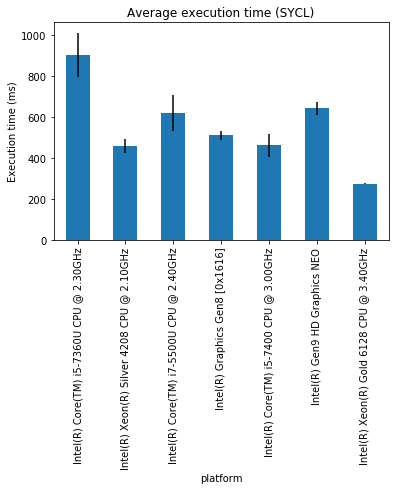

In [4]:
# Plot results
df = pd.read_csv(FILENAME)
by_version = df[df.version == 'SYCL'].groupby(by="platform", sort=False)
avg_time = by_version.mean()
std = by_version.std()
plt = avg_time.plot(legend=False, kind="bar", yerr=std)
plt.set_title("Average execution time (SYCL)")
plt.set_ylabel("Execution time (ms)")

Text(0, 0.5, 'Execution time (ms)')

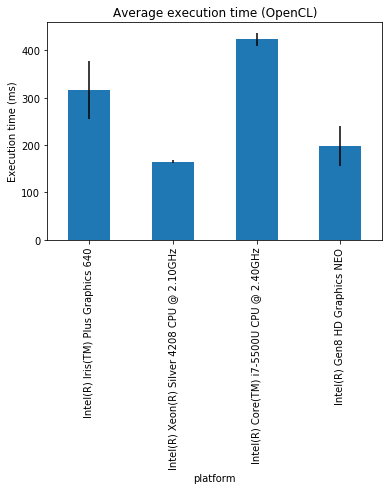

In [20]:
# Plot results
df = pd.read_csv(FILENAME)
by_version = df[df.version == 'OpenCL'].groupby(by="platform", sort=False)
avg_time = by_version.mean()
std = by_version.std()
plt = avg_time.plot(legend=False, kind="bar", yerr=std)
plt.set_title("Average execution time (OpenCL)")
plt.set_ylabel("Execution time (ms)")

Text(0, 0.5, 'Execution time (ms)')

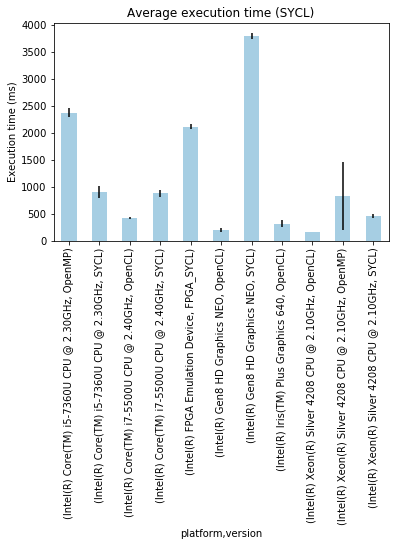

In [2]:
# Plot results
df = pd.read_csv(FILENAME)
by_version = df.groupby(['platform', 'version'])
avg_time = by_version.mean()
std = by_version.std()
plt = avg_time.plot(legend=False, kind="bar", yerr=std, stacked=True)
plt.set_title("Average execution time (SYCL)")
plt.set_ylabel("Execution time (ms)")

In [39]:
#===================================CREATE CMP DIRECTORY FOR IMAGES===================================
os.system("rm -r ../../datasets/CMP")
os.system("mkdir ../../datasets/CMP")

0

In [41]:
#---------------------------------------Generate OpenCL Images----------------------------------------
os.system("suoldtonew < OpenCL/build/cmp.c.su | supsimage > ../../datasets/CMP/ocl-cmp.c.eps")
os.system("gs -dSAFER -dBATCH -dNOPAUSE -dEPSCrop -r50 -sDEVICE=pngalpha -sOutputFile=../../datasets/CMP/ocl-cmp.c.png ../../datasets/CMP/ocl-cmp.c.eps")
os.system("suoldtonew < OpenCL/build/cmp.coher.su | supsimage > ../../datasets/CMP/ocl-cmp.coher.eps")
os.system("gs -dSAFER -dBATCH -dNOPAUSE -dEPSCrop -r50 -sDEVICE=pngalpha -sOutputFile=../../datasets/CMP/ocl-cmp.coher.png ../../datasets/CMP/ocl-cmp.coher.eps")
os.system("suoldtonew < OpenCL/build/cmp.stack.su | supsimage > ../../datasets/CMP/ocl-cmp.stack.eps")
os.system("gs -dSAFER -dBATCH -dNOPAUSE -dEPSCrop -r50 -sDEVICE=pngalpha -sOutputFile=../../datasets/CMP/ocl-cmp.stack.png ../../datasets/CMP/ocl-cmp.stack.eps")
#---------------------------------------Generate OpenMP Images----------------------------------------
os.system("suoldtonew < OpenMP/build/cmp.c.su | supsimage > ../../datasets/CMP/omp-cmp.c.eps")
os.system("gs -dSAFER -dBATCH -dNOPAUSE -dEPSCrop -r50 -sDEVICE=pngalpha -sOutputFile=../../datasets/CMP/omp-cmp.c.png ../../datasets/CMP/omp-cmp.c.eps")
os.system("suoldtonew < OpenMP/build/cmp.coher.su | supsimage > ../../datasets/CMP/omp-cmp.coher.eps")
os.system("gs -dSAFER -dBATCH -dNOPAUSE -dEPSCrop -r50 -sDEVICE=pngalpha -sOutputFile=../../datasets/CMP/omp-cmp.coher.png ../../datasets/CMP/omp-cmp.coher.eps")
os.system("suoldtonew < OpenMP/build/cmp.stack.su | supsimage > ../../datasets/CMP/omp-cmp.stack.eps")
os.system("gs -dSAFER -dBATCH -dNOPAUSE -dEPSCrop -r50 -sDEVICE=pngalpha -sOutputFile=../../datasets/CMP/omp-cmp.stack.png ../../datasets/CMP/omp-cmp.stack.eps")
#---------------------------------------Generate SYCL Images------------------------------------------
os.system("suoldtonew < SYCL/build/cmp.c.su | supsimage > ../../datasets/CMP/sycl-cmp.c.eps")
os.system("gs -dSAFER -dBATCH -dNOPAUSE -dEPSCrop -r50 -sDEVICE=pngalpha -sOutputFile=../../datasets/CMP/sycl-cmp.c.png ../../datasets/CMP/sycl-cmp.c.eps")
os.system("suoldtonew < SYCL/build/cmp.coher.su | supsimage > ../../datasets/CMP/sycl-cmp.coher.eps")
os.system("gs -dSAFER -dBATCH -dNOPAUSE -dEPSCrop -r50 -sDEVICE=pngalpha -sOutputFile=../../datasets/CMP/sycl-cmp.coher.png ../../datasets/CMP/sycl-cmp.coher.eps")
os.system("suoldtonew < SYCL/build/cmp.stack.su | supsimage > ../../datasets/CMP/sycl-cmp.stack.eps")
os.system("gs -dSAFER -dBATCH -dNOPAUSE -dEPSCrop -r50 -sDEVICE=pngalpha -sOutputFile=../../datasets/CMP/sycl-cmp.stack.png ../../datasets/CMP/sycl-cmp.stack.eps")
#---------------------------------------Generate FPGA_SYCL Images------------------------------------------
os.system("suoldtonew < FPGA_SYCL/build/cmp.c.su | supsimage > ../../datasets/CMP/fpga_sycl-cmp.c.eps")
os.system("gs -dSAFER -dBATCH -dNOPAUSE -dEPSCrop -r50 -sDEVICE=pngalpha -sOutputFile=../../datasets/CMP/fpga_sycl-cmp.c.png ../../datasets/CMP/fpga_sycl-cmp.c.eps")
os.system("suoldtonew < FPGA_SYCL/build/cmp.coher.su | supsimage > ../../datasets/CMP/fpga_sycl-cmp.coher.eps")
os.system("gs -dSAFER -dBATCH -dNOPAUSE -dEPSCrop -r50 -sDEVICE=pngalpha -sOutputFile=../../datasets/CMP/fpga_sycl-cmp.coher.png ../../datasets/CMP/fpga_sycl-cmp.coher.eps")
os.system("suoldtonew < FPGA_SYCL/build/cmp.stack.su | supsimage > ../../datasets/CMP/fpga_sycl-cmp.stack.eps")
os.system("gs -dSAFER -dBATCH -dNOPAUSE -dEPSCrop -r50 -sDEVICE=pngalpha -sOutputFile=../../datasets/CMP/fpga_sycl-cmp.stack.png ../../datasets/CMP/fpga_sycl-cmp.stack.eps")

0

../../datasets/CMP/ocl-cmp.c.png
../../datasets/CMP/omp-cmp.c.png
../../datasets/CMP/sycl-cmp.c.png
../../datasets/CMP/fpga_sycl-cmp.c.png
../../datasets/CMP/ocl-cmp.coher.png
../../datasets/CMP/omp-cmp.coher.png
../../datasets/CMP/sycl-cmp.coher.png
../../datasets/CMP/fpga_sycl-cmp.coher.png
../../datasets/CMP/ocl-cmp.stack.png
../../datasets/CMP/omp-cmp.stack.png
../../datasets/CMP/sycl-cmp.stack.png
../../datasets/CMP/fpga_sycl-cmp.stack.png


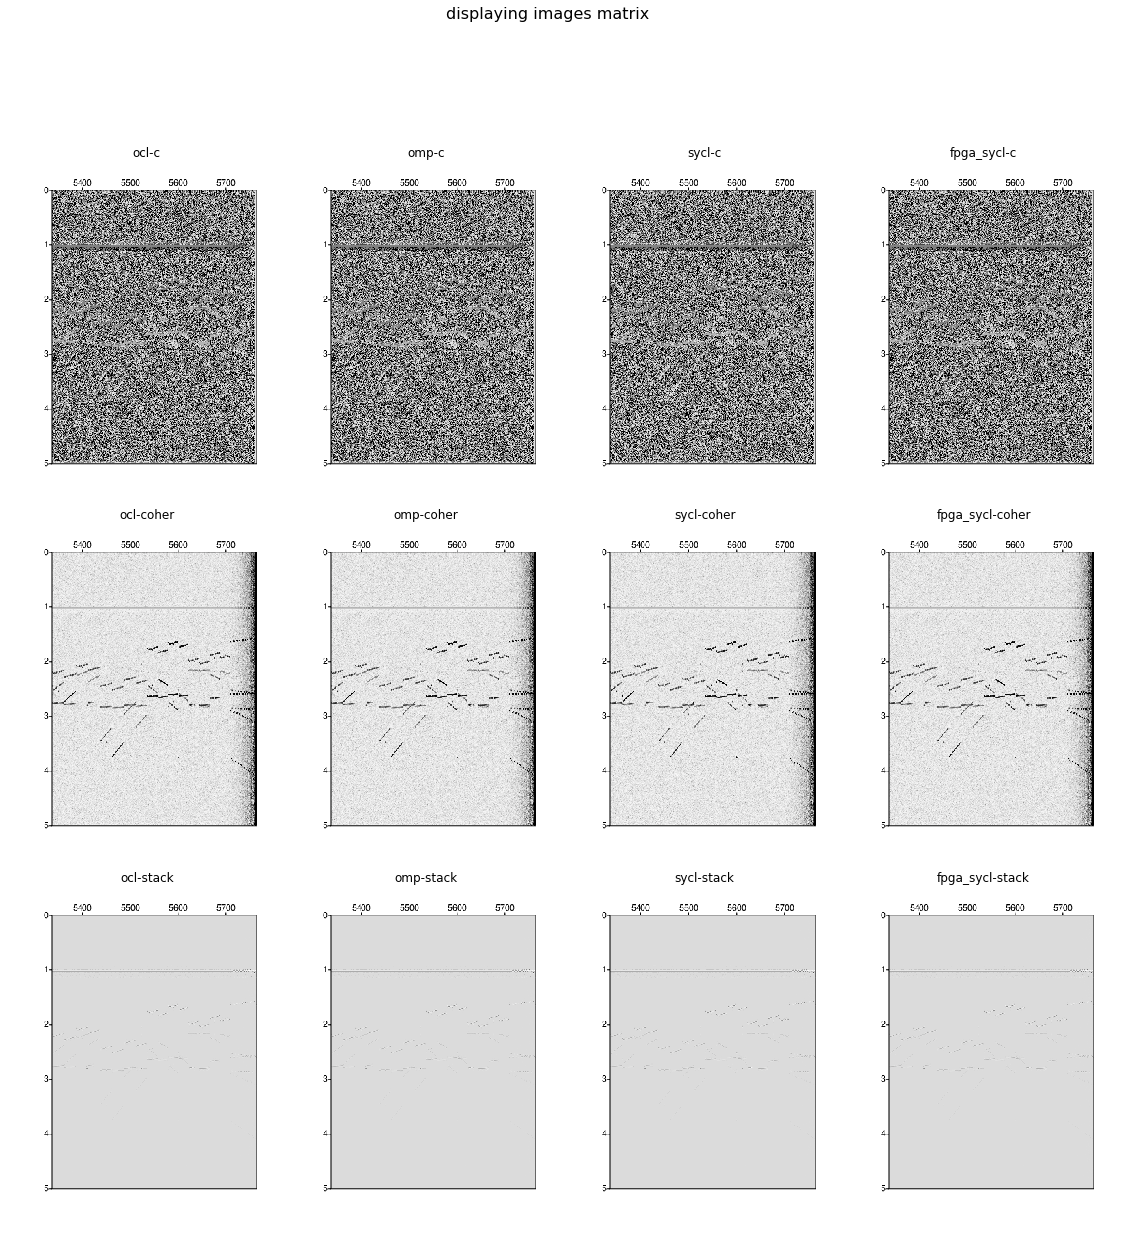

In [31]:
import matplotlib.pyplot as plt

names = ["c", "coher", "stack"]
versions = ["ocl", "omp", "sycl", "fpga_sycl"]

images = []
for i, name in enumerate(names):
    images.append([])
    for j, version in enumerate(versions):
        print("../../datasets/CMP/"+version+"-cmp."+name+".png")
        images[i].append(plt.imread("../../datasets/CMP/"+version+"-cmp."+name+".png"))
        
NUM_ROWS = len(names)
IMGs_IN_ROW = len(versions)

f, ax_arr = plt.subplots(NUM_ROWS, IMGs_IN_ROW, figsize=(20, 20))

for i, row in enumerate(ax_arr):
    for j, ax in enumerate(row):
        ax.imshow(images[i][j])
        ax.set_frame_on(False)
        ax.axis('off')
        ax.set_title(versions[j]+"-"+names[i])
        ax.set_aspect('equal')

f.subplots_adjust(wspace=0, hspace=0)
        
title = 'displaying images matrix'
f.suptitle(title, fontsize=16)
plt.show()  